# Warning
This notebook is under development

# Experiments on cutting data with lag or lead

## Import libraries

In [1]:
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# IMPORT Ole's fixed TMSiSDK python interfacwe- may change
sys.path.insert(0,'C:/Projects/tmsi-python-interface')
from TMSiSDK.file_readers import Poly5Reader
import collections
import math
sys.path.insert(0, '../rsemg')
import helper_functions as hf

C:\Users\makeda\anaconda3\envs\remgenv-4\lib\site-packages\mne\fixes.py:321: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(scipy.__version__) >= '1.1':
C:\Users\makeda\anaconda3\envs\remgenv-4\lib\site-packages\mne\fixes.py:1134: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(numba.__version__) < LooseVersion('0.40'):
C:\Users\makeda\anaconda3\envs\remgenv-4\lib\site-packages\mne\fixes.py:1134: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(numba.__version__) < LooseVersion('0.40'):


# Set a collection place for experiments

In [2]:
# do not rerun this cell
big_data_list= []

Below change the path to the root directory where you are keeping your EMGs and ventilator "Draeger" files

# Reruns should be done from this cell as the start

In [3]:
root_emg_directory = os.path.join('../not_pushed','topspin_data_anonymized')

In [4]:
emg_pattern = os.path.join(root_emg_directory, '**/*.Poly5')
emg_and_draeger_files = glob.glob(emg_pattern, recursive=True)

emg_files = []
draeger_files = []

for file in emg_and_draeger_files:
    if 'Draeger' in file:
        draeger_files.append(file)
    else:
        emg_files.append(file)

Now you can pick a file from the list, which have been numbered.

In [5]:
list_of_numbers_strung = []
for i in range(len(emg_files)):
    list_of_numbers_strung.append(str(i))


btn = widgets.Dropdown(
    options=list_of_numbers_strung,
    value='0',
    description='Picked File:',
    disabled=False,
)
display(btn)

Dropdown(description='Picked File:', options=('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '1…

In [8]:
number_chosen = int(btn.value)
emg_file_chosen = emg_files[number_chosen] 
draeger_file_chosen= draeger_files[number_chosen] 
print("The files you chose are:\n",emg_file_chosen,'\n',draeger_file_chosen)

The files you chose are:
 ../not_pushed\topspin_data_anonymized\M001\006\EMG_recording.Poly5 
 ../not_pushed\topspin_data_anonymized\M001\006\Draeger_recording.Poly5


In [9]:
# get the poly5 reading
data_emg = Poly5Reader(emg_file_chosen)
data_draeger= Poly5Reader(draeger_file_chosen)
data_emg_samples= data_emg.samples
emg_sample_rate = data_emg.sample_rate
data_draeger_samples= data_draeger.samples
draeger_sample_rate = data_draeger.sample_rate
# converted_to_seconds =  []
# for i in range(len(data_samples[0])):
#     converted_to_seconds.append(i/emg_sample_rate)

Reading file  ../not_pushed\topspin_data_anonymized\M001\006\EMG_recording.Poly5
	 Number of samples:  762496 
	 Number of channels:  3 
	 Sample rate: 2048 Hz
Done reading data.
Reading file  ../not_pushed\topspin_data_anonymized\M001\006\Draeger_recording.Poly5
	 Number of samples:  37231 
	 Number of channels:  3 
	 Sample rate: 100 Hz
Done reading data.


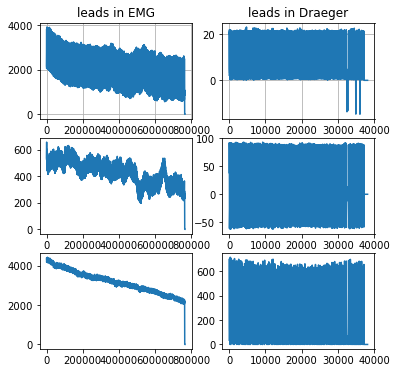

In [12]:
%matplotlib inline
# set up plot
x_emg = data_emg_samples
x_draeger = data_draeger_samples
fig, axis = plt.subplots(nrows = 3, ncols = 2, figsize=(6, 6))
#ax.set_ylim([-4, 4])
axis[0,0].grid(True)
axis[0,0].plot(x_emg[0])
axis[0,0].set(title='leads in EMG')
axis[1,0].plot(x_emg[1])
axis[2,0].plot(x_emg[2])
axis[0,1].set(title='leads in Draeger')
axis[0,1].grid(True)
axis[0,1].plot(x_draeger[0])
axis[1,1].plot(x_draeger[1])
axis[2,1].plot(x_draeger[2])

That is the whole unfiltered EMG, but you probably want to examine a part. You will also want to examine something filtered down to only the EMG components. Therefore we will filter off only the EMG components with an ICA in addtion to the filter we will play with.

Now you can filter down to which part you want to see. 

Do you want to cut and see the file in samples or seconds?

In [13]:
# y_axis = widgets.Dropdown(
#     options=["Samples","Seconds"],
#     value='Samples',
#     description="Select View Option",
#     disabled=False,
# )
# display(y_axis)


Dropdown(description='Select View Option', options=('Samples', 'Seconds'), value='Samples')

In [34]:
# time_view= y_axis.value
# time_view

'Seconds'

## AUtomatic matching, when you know the lag/lead

Now you can input the time difference between the two samples.

In [26]:

dropdown = widgets.Dropdown(
    options=["leads","lags"],
    value='lags',
    description="The EMG",
    disabled=False,
)

time_difference = widgets.Combobox(
    placeholder='type in number of milliseconds ',
    options=['',], 
    description='time difference'
)


# a VBox container to pack widgets vertically
widgets.VBox(
    [
        dropdown, 
        time_difference,
    ]
)

In [27]:
time_difference = int(time_difference.value)
lead_lag = dropdown.value
# if lead_lag == 'lags':
# #chopped = draeger
# else:
# # chopped = emg


<class 'int'>


In [36]:
# type in start number and press return for it to update
start = input()

330


In [37]:
# type in end number and press return for it to update
end= input()

350


In [30]:
# start_s = float(start)* emg_sample_rate
# end_s = float(end)*emg_sample_rate

In [28]:
# if time_view == 'Samples':
#     # nox examine at a certain scale- from point a to b as samples
#     x = data_samples
#     fig, (ax_1,ax_2,ax_3) = plt.subplots(nrows = 3, figsize=(6, 4))
#     ax_1.grid(True)
#     ax_1.plot(x[0][int(start):int(end)])
#     ax_1.set(title='leads, samples')
#     ax_2.plot(x[1][int(start):int(end)])
#     ax_3.plot(x[2][int(start):int(end)])
    
# if time_view == 'Seconds':
#     # nox examine at a certain scale- from point a to b as samples
#     x_for_secs = data_samples
#     y = converted_to_seconds
#     fig, (ax_1,ax_2,ax_3) = plt.subplots(nrows = 3, figsize=(6, 4))
#     ax_1.grid(True)
#     ax_1.plot(y[int(start_s):int(end_s)],x[0][int(start_s):int(end_s)])
#     ax_1.set(title='leads, seconds')
#     ax_2.plot(y[int(start_s):int(end_s)],x[1][int(start_s):int(end_s)])
#     ax_3.plot(y[int(start_s):int(end_s)],x[2][int(start_s):int(end_s)])

Happy with your selection? If not redo, then we can see how the filter works on it.

Once you are happy leave it. The values are then stored once you run the cellbelow:

In [38]:
high_end_cut =int_slider2.value
low_end_cut =int_slider1.value


# Visual examination based hand matching
We can look at the two arrays and adjust by hand


In [48]:
df.to_csv('my_saved_experiments.csv')

You probably want to change the name to a timestamp, and save every hour, at least. 